In [70]:
# В таблицу table1 записать 1000 строк с случайными значениями (3 колонки, тип int) от 0 до 1000.
# Далее построить гистаграмму распределения этих трех колонок

import pandas as pd
import numpy as np
import sqlite3 as db
import seaborn as sns
import matplotlib.pyplot as plt 

In [71]:
table1 = pd.DataFrame((1000*np.random.random_sample(size=(1000, 3))).astype('int32'))

In [82]:
conn = db.connect(":memory:") 
curr = conn.cursor()
# на основе датафрейма table1 создем таблицу в sqlite3 с именем table1
table1.to_sql(name='table1', con=conn)

In [83]:
# считываем таблицу table1 из БД и сохраняем в df
result = curr.execute('select * from table1')
df = pd.DataFrame(result)
df.drop(labels=[0], axis=1, inplace=True)
df.info()

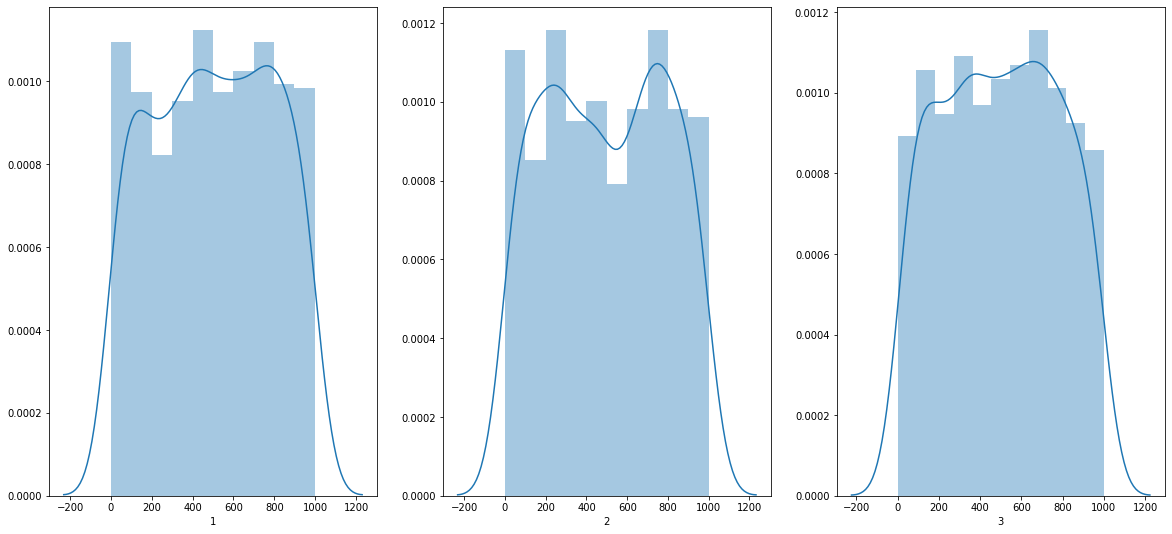

In [97]:
# отрисовываем гистограммы распределения трех столбцов
plt.figure(figsize=(20,9))
plt.subplot(1, 3, 1)
sns.distplot(df[1])
plt.subplot(1, 3, 2)
sns.distplot(df[2])
plt.subplot(1, 3, 3)
sns.distplot(df[3])
plt.show()